In [10]:
import pandas as pd
import numpy as np

In [19]:
import pandas as pd
import numpy as np
import json
import sys
from pathlib import Path
from datetime import datetime, timedelta, date
import time

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

pd.options.display.float_format = '{:,.2f}'.format

import warnings
warnings.filterwarnings("ignore")


## LETTURA FILE 

In [12]:
#LEGGO FILE JSON E SALVO FEATURES IMPORTANTI
samples = 2000000
myfile = pd.read_json('dataset.json', lines=True, nrows = samples)
myvec = myfile[[0,1,2,3,4,5]].values

In [20]:
print(f"Shape of myvec: {myvec.shape}")

Shape of myvec: (2000000, 6)


## VISUALIZZAZIONE DATASET

In [21]:
#PRINT DI PROVA PER VEDERE COM'E' STRUTTURATO IL DATASET
myfile

,0,1,2,3,4,5
0,47.87,1.89,5,"[21.1765, 8.36586, 29.0269, 4.149, 5, 2.68624e...","[32.8902, 3, 7, 0.16244799999999998, 1.59408, ...","[[[0.031162699999999998, 0.0820037, 0.0714865,..."
1,34.97,0.61,5,"[5.0077, 3.03583, 2.00754, 0.32992099999999996...","[25.1935, 1, 3, 0.122343, 2.23962, 0.930326999...","[[[-0.029083699999999997, 0.12274499999999999,..."
2,26.57,-0.53,5,"[0.8078839999999999, 0.6305649999999999, 1.044...","[-1, -1, -1, inf, -1, -inf]","[[[-0.00689455, -0.379085, 0.0617111, -0.02322..."
3,36.92,-2.07,5,"[16.5617, 10.357, 17.5166, 30.4992, 4, 4.35319...","[73.6335, 1, 2, 0.259107, 0.755648, 0.594634]","[[[0.0183914, -0.00212568, -0.0371646999999999..."
4,28.97,1.51,5,"[18.0325, 16.1445, 3.29359, 9.00347, 4, 3.3143...","[293.79, 1, 4, 0.0871323, 1.40008, 1.00014]","[[[-0.753196, 3.5972, -0.11093000000000001, 0...."
...,...,...,...,...,...,...
1999995,35.12,0.25,5,"[2.11239, 1.33285, 0.441166, 0.217754, 2, 0.00...","[11.3646, 1, 2, 1.05865, 1.40955, 0.4634169999...","[[[-0.018917299999999998, -0.04698149999999999..."
1999996,34.83,-0.81,5,"[0.824012, 0.41628000000000004, 1.37785, 0.760...","[-1, -1, -1, inf, -1, -inf]","[[[-0.029111599999999998, 0.21481000000000003,..."
1999997,29.48,-0.84,5,"[1.45084, 1.2525, 0.770663, 1.96815, 1, 0.0006...","[19.5591, 1, 2, 0.21088, 0.9837539999999999, 0...","[[[-0.0512568, 0.12014799999999999, -0.0262429..."
1999998,25.75,-0.87,5,"[3.99771, -inf, 1.21638, -inf, 2, 6.86975e-05,...","[16.9286, 1, 2, 0.0895229, 0.888597, 0.9558249...","[[[0.0505243, 0.14080199999999998, 0.278899, -..."


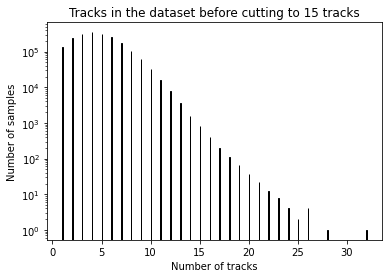

In [22]:
import matplotlib.pyplot as plt
#VISUALIZZAZIONE DELLE FEATURE DI BASSO LIVELLO
#Seleziono la colonna con le feature di basso livello
my_array = myvec[:,5]

# Calcola la lunghezza di ogni lista nell'array
lengths = [len(lst) for lst in my_array]

# Crea l'istogramma
plt.hist(lengths, bins='auto', edgecolor='black', log=True)

# Aggiungo le etichette degli assi
plt.xlabel('Number of tracks')
plt.ylabel('Number of samples')
plt.title('Tracks in the dataset before cutting to 15 tracks')

plt.savefig('hist_track.png')

In [24]:
#Riorganizzo il dataset in una tabella ciascuna colonna corrisponde ad una feature
arr = np.zeros(len(myvec[0,3])*samples)
arr = arr.reshape(samples, len(myvec[0,3]))
for i,list in enumerate(myvec[:,3]):
    for j,lst in enumerate(list):
        arr[i,j] = lst
        
print(arr.shape)      

# Creazione di un DataFrame dai nuovi valori
new_columns = ['track_2_d0_significance', 'track_3_d0_significance',
'track_2_z0_significance', 'track_3_z0_significance',
'n_tracks_over_d0_threshold', 'jet_prob', 'jet_width_eta', 'jet_width_phi'
]
new_df = pd.DataFrame(arr, columns=new_columns)

# Concatenazione dei DataFrame in base alle colonne
myfile = pd.concat([myfile.iloc[:, 0:3], new_df], axis=1)

(2000000, 8)


In [25]:
# Initialize the array
arr = np.zeros((samples, len(myvec[0,4])))

# Iterate over myvec and assign values to arr
for i, lst in enumerate(myvec[:,4]):
    numeric_list = [float(x) if x not in ['inf', '-inf'] else x for x in lst]
    for j, val in enumerate(numeric_list):
        arr[i,j] = val

# Create a DataFrame from the new values
new_columns = ['vertex_significance', 'n_secondary_vertices', 'n_secondary_vertex_tracks',
               'delta_r_vertex', 'vertex_mass', 'vertex_energy_fraction']
new_df = pd.DataFrame(arr, columns=new_columns)

# Concatenate the DataFrames
myfile = pd.concat([myfile, new_df], axis=1)

# Convert myfile to float type
myfile_float = myfile.astype(float)

# Riconverto gli infiniti in valori numerici
max_values = myfile_float.replace([np.inf, -np.inf], np.nan).max()
min_values = myfile_float.replace([np.inf, -np.inf], np.nan).min()

print(max_values)

0                              696.71
1                                2.50
2                                5.00
track_2_d0_significance        239.08
track_3_d0_significance        246.41
track_2_z0_significance      1,863.84
track_3_z0_significance      2,195.40
n_tracks_over_d0_threshold      19.00
jet_prob                         0.43
jet_width_eta                    0.40
jet_width_phi                    0.40
vertex_significance          6,207.69
n_secondary_vertices            12.00
n_secondary_vertex_tracks       52.00
delta_r_vertex                   7.17
vertex_mass                     24.06
vertex_energy_fraction           4.33
dtype: float64


In [26]:
#VERIFICO CHE myfile SIA DIVISO NELLE COLONNE CORRETTE
myfile = myfile.rename(columns={0: 'jet_pt', 1: 'jet_eta', 2: 'flavor' })
myfile

,jet_pt,jet_eta,flavor,track_2_d0_significance,track_3_d0_significance,track_2_z0_significance,track_3_z0_significance,n_tracks_over_d0_threshold,jet_prob,jet_width_eta,jet_width_phi,vertex_significance,n_secondary_vertices,n_secondary_vertex_tracks,delta_r_vertex,vertex_mass,vertex_energy_fraction
0,47.87,1.89,5,21.18,8.37,29.03,4.15,5.00,0.00,0.06,0.06,32.89,3.00,7.00,0.16,1.59,0.86
1,34.97,0.61,5,5.01,3.04,2.01,0.33,3.00,0.00,0.07,0.15,25.19,1.00,3.00,0.12,2.24,0.93
2,26.57,-0.53,5,0.81,0.63,1.04,1.28,0.00,0.05,0.10,0.11,-1.00,-1.00,-1.00,inf,-1.00,-inf
3,36.92,-2.07,5,16.56,10.36,17.52,30.50,4.00,0.00,0.16,0.12,73.63,1.00,2.00,0.26,0.76,0.59
4,28.97,1.51,5,18.03,16.14,3.29,9.00,4.00,0.00,0.09,0.09,293.79,1.00,4.00,0.09,1.40,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,35.12,0.25,5,2.11,1.33,0.44,0.22,2.00,0.00,0.12,0.13,11.36,1.00,2.00,1.06,1.41,0.46
1999996,34.83,-0.81,5,0.82,0.42,1.38,0.76,0.00,0.05,0.07,0.03,-1.00,-1.00,-1.00,inf,-1.00,-inf
1999997,29.48,-0.84,5,1.45,1.25,0.77,1.97,1.00,0.00,0.05,0.13,19.56,1.00,2.00,0.21,0.98,0.58
1999998,25.75,-0.87,5,4.00,-inf,1.22,-inf,2.00,0.00,0.04,0.06,16.93,1.00,2.00,0.09,0.89,0.96


In [27]:
print(len(myfile.columns))

17


In [28]:
# Sostituzione dei valori "inf" con il massimo per ogni colonna
myfile.replace(float(np.inf), 2*max_values, inplace=True)
myfile.replace(float(-np.inf), 0.5*min_values, inplace=True)

In [29]:
myfile

,jet_pt,jet_eta,flavor,track_2_d0_significance,track_3_d0_significance,track_2_z0_significance,track_3_z0_significance,n_tracks_over_d0_threshold,jet_prob,jet_width_eta,jet_width_phi,vertex_significance,n_secondary_vertices,n_secondary_vertex_tracks,delta_r_vertex,vertex_mass,vertex_energy_fraction
0,47.87,1.89,5,21.18,8.37,29.03,4.15,5.00,0.00,0.06,0.06,32.89,3.00,7.00,0.16,1.59,0.86
1,34.97,0.61,5,5.01,3.04,2.01,0.33,3.00,0.00,0.07,0.15,25.19,1.00,3.00,0.12,2.24,0.93
2,26.57,-0.53,5,0.81,0.63,1.04,1.28,0.00,0.05,0.10,0.11,-1.00,-1.00,-1.00,14.33,-1.00,0.01
3,36.92,-2.07,5,16.56,10.36,17.52,30.50,4.00,0.00,0.16,0.12,73.63,1.00,2.00,0.26,0.76,0.59
4,28.97,1.51,5,18.03,16.14,3.29,9.00,4.00,0.00,0.09,0.09,293.79,1.00,4.00,0.09,1.40,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,35.12,0.25,5,2.11,1.33,0.44,0.22,2.00,0.00,0.12,0.13,11.36,1.00,2.00,1.06,1.41,0.46
1999996,34.83,-0.81,5,0.82,0.42,1.38,0.76,0.00,0.05,0.07,0.03,-1.00,-1.00,-1.00,14.33,-1.00,0.01
1999997,29.48,-0.84,5,1.45,1.25,0.77,1.97,1.00,0.00,0.05,0.13,19.56,1.00,2.00,0.21,0.98,0.58
1999998,25.75,-0.87,5,4.00,0.00,1.22,0.00,2.00,0.00,0.04,0.06,16.93,1.00,2.00,0.09,0.89,0.96


In [30]:
#RIDEFINISCO VETTORE DI FEATURES
myvec = myfile[myfile.columns].values
myvec.shape

(2000000, 17)

In [31]:
#CLASSIFICAZIONE IN BASE ALLA TERZA FEATURE (CLASSE): SE 0 -> LIGHTJET; SE 4 -> CHARM JET; SE 5 -> BOTTOM JET
light_vec = myvec[myvec[:, 2] == 0]
charm_vec = myvec[myvec[:, 2] == 4]
bottom_vec = myvec[myvec[:, 2] == 5]

#Printo risultati per verificare che la divisione sia avvenuta con successo
print(f"Shape light vec: {light_vec.shape}")
print(f"Shape charm vec: {charm_vec.shape}")
print(f"Shape bottom vec: {bottom_vec.shape}")
print(f"Total length: {len(light_vec) + len(charm_vec) + len(bottom_vec)}")

Shape light vec: (165466, 17)
Shape charm vec: (5784, 17)
Shape bottom vec: (1828750, 17)
Total length: 2000000


In [32]:
myfile.columns

Index(['jet_pt', 'jet_eta', 'flavor', 'track_2_d0_significance',
       'track_3_d0_significance', 'track_2_z0_significance',
       'track_3_z0_significance', 'n_tracks_over_d0_threshold', 'jet_prob',
       'jet_width_eta', 'jet_width_phi', 'vertex_significance',
       'n_secondary_vertices', 'n_secondary_vertex_tracks', 'delta_r_vertex',
       'vertex_mass', 'vertex_energy_fraction'],
      dtype='object')

COMANDO PER SALVARE LE RIGHE DELLA TABELLA IN FILE CSV:

In [34]:
# Assuming your DataFrame is named myfile
myfile.to_csv('dati.csv', index=False)

## Grafici di correlazione delle features

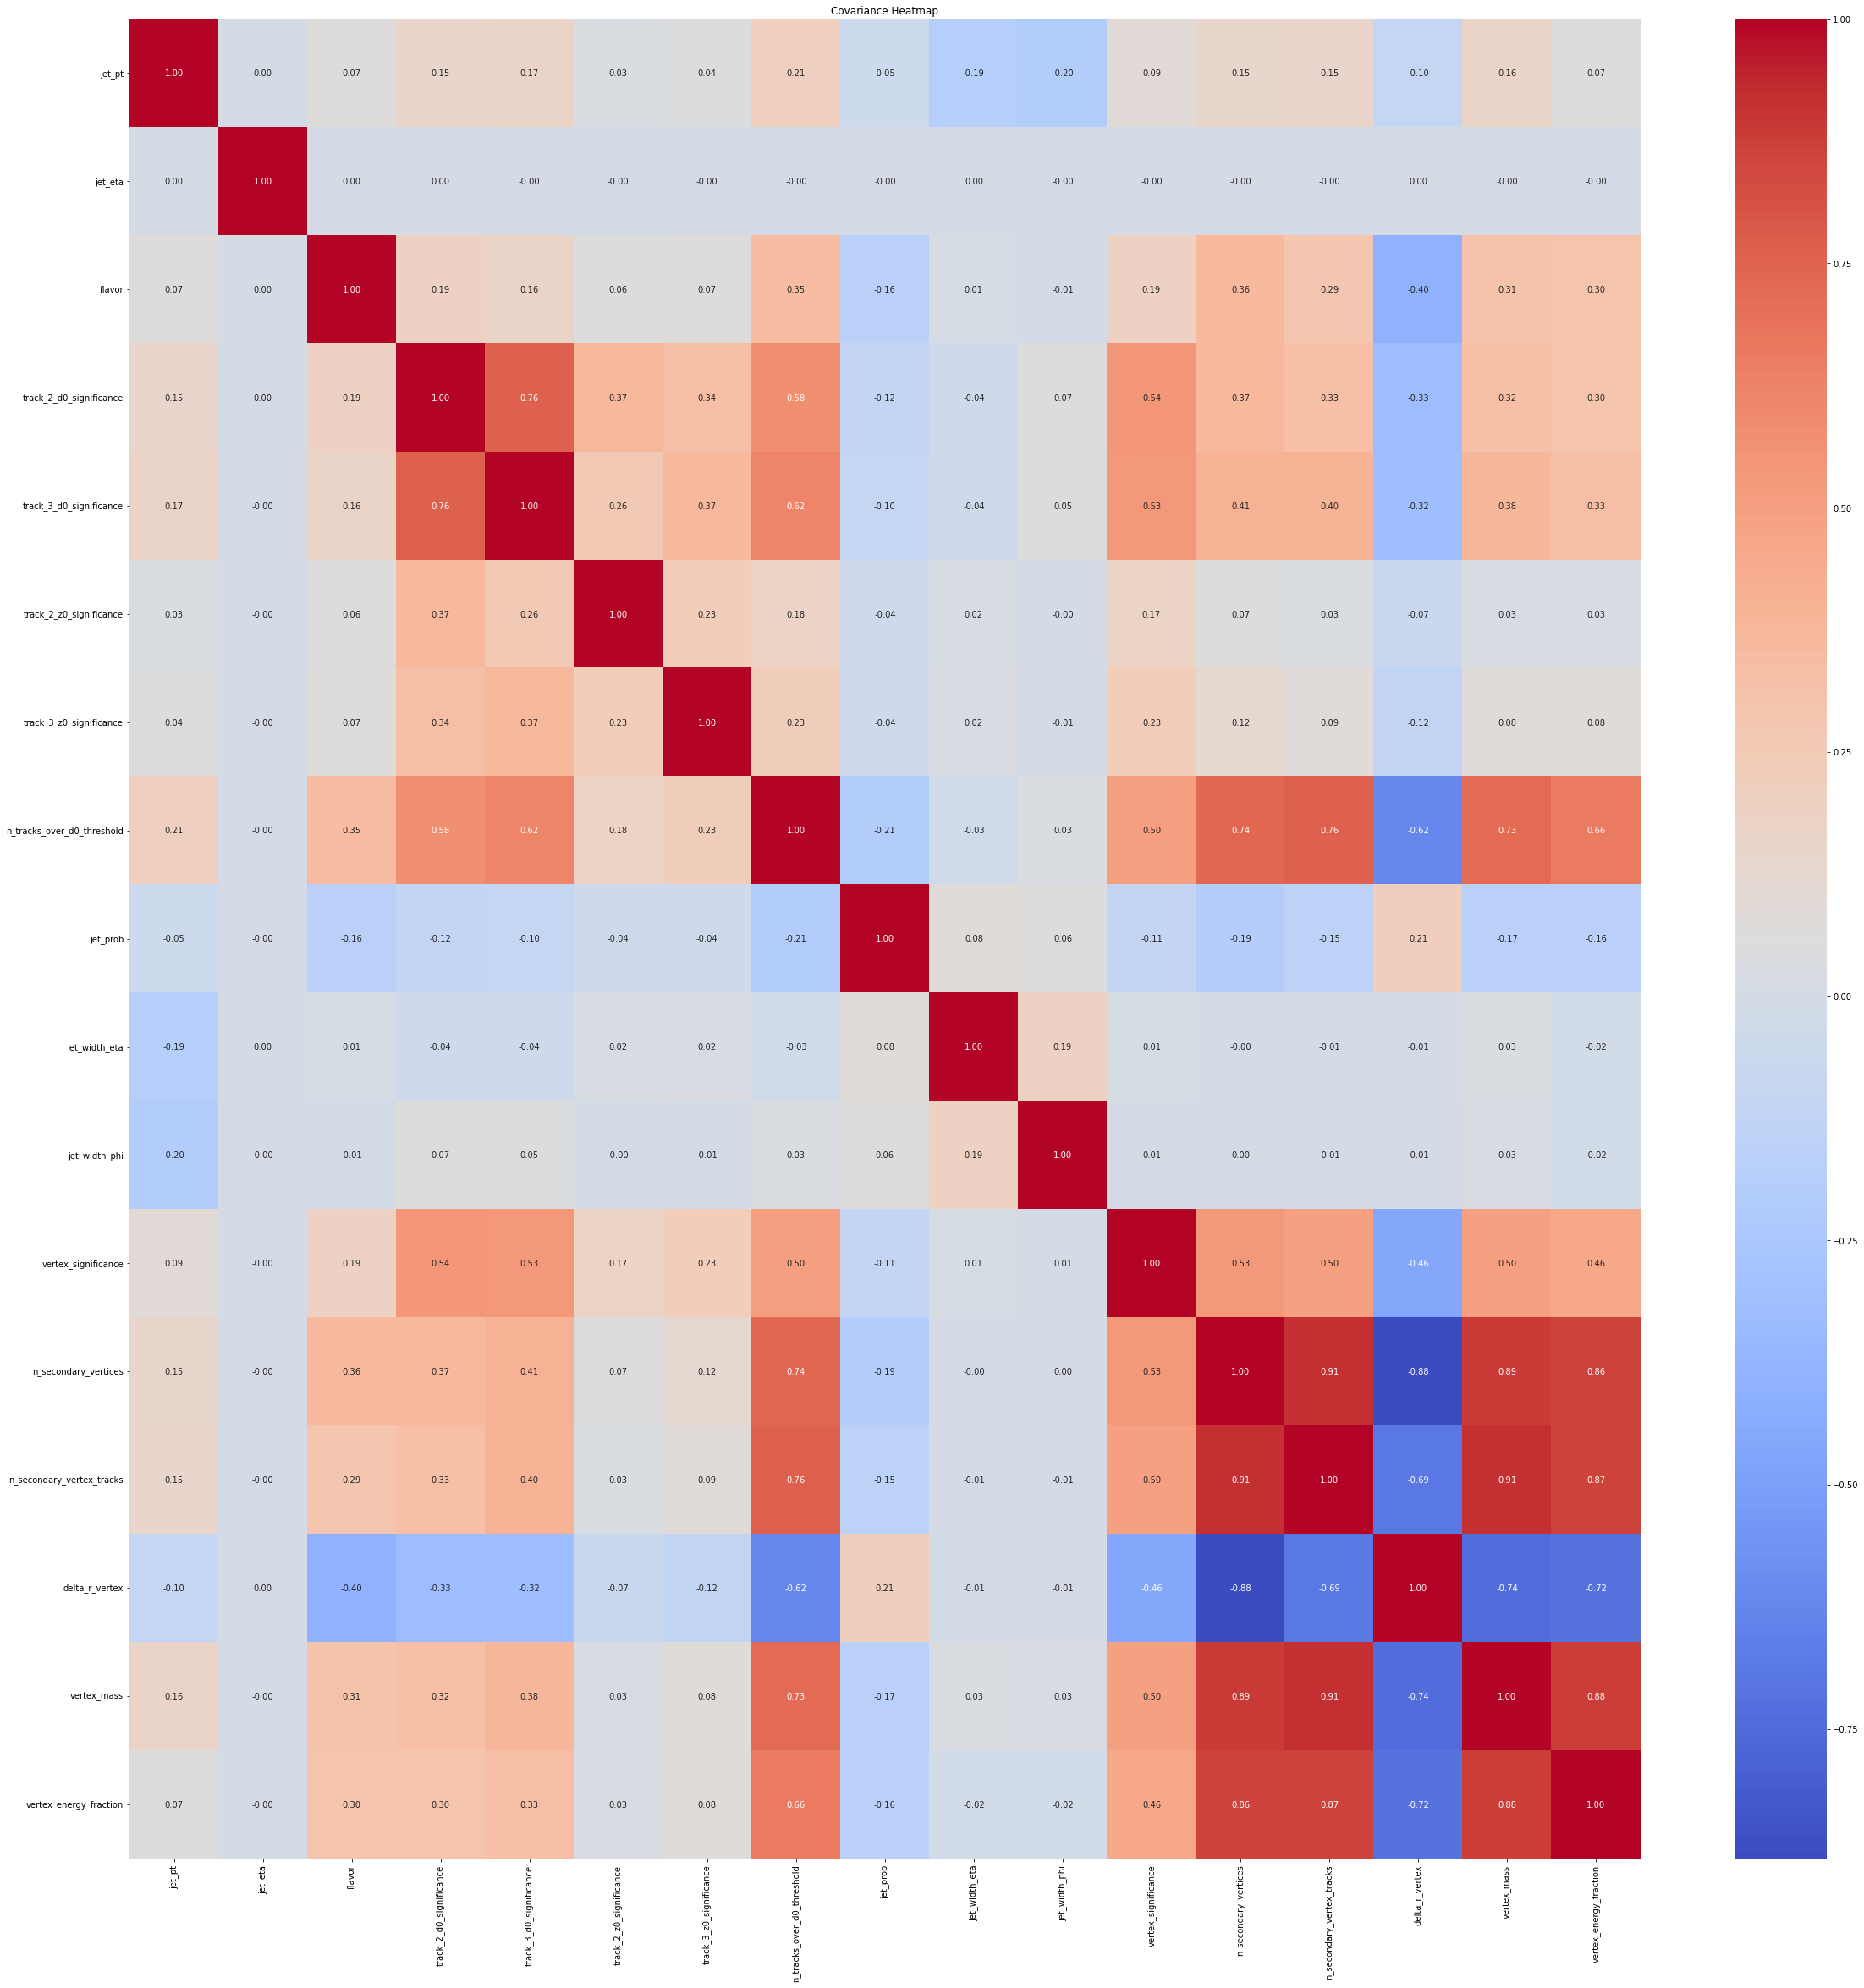

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the pairwise covariance
cov_matrix = myfile.corr()

# Set the figsize
fig, ax = plt.subplots(figsize=(40, 40))

# Create a covariance heatmap
sns.heatmap(cov_matrix, cmap='coolwarm', annot=True, fmt='.2f', ax=ax)

# Set the title of the heatmap
plt.title('Covariance Heatmap')

# Display the heatmap
plt.show()

## Distribuzioni delle features

In [20]:
import matplotlib.pyplot as plt

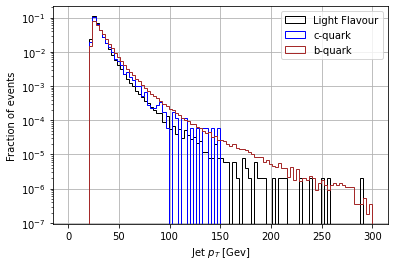

In [44]:
#1
n_bins = 100
fig1 = plt.figure()
_, _, _ = plt.hist(light_vec[:, 0], bins = n_bins, density = True, histtype = 'step', color = 'k', range = (0, 300), log = True, label = 'Light Flavour')
_, _, _ = plt.hist(charm_vec[:, 0], bins = n_bins, density = True, histtype = 'step', color = 'blue', range = (0, 300), log = True, label = 'c-quark')
_, _, _ = plt.hist(bottom_vec[:, 0], bins = n_bins, density = True, histtype = 'step', color = 'brown', range = (0, 300), log = True, label = 'b-quark')
plt.xlabel("Jet $p_T$ [Gev]")
plt.ylabel("Fraction of events")
plt.grid()
plt.legend()
#plt.show()
plt.savefig("prova.pdf")

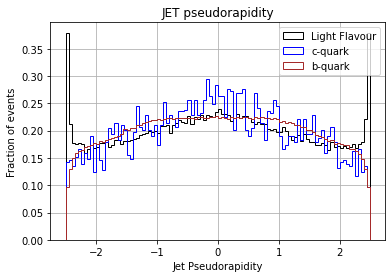

In [45]:
#2
n_bins = 100
fig2 = plt.figure()
plt.grid()
plt.title("JET pseudorapidity")
_, _, _ = plt.hist(light_vec[:, 1], bins = n_bins, density = True, histtype = 'step', color = 'k', label = 'Light Flavour')
_, _, _ = plt.hist(charm_vec[:, 1], bins = n_bins, density = True, histtype = 'step', color = 'blue', label = 'c-quark')
_, _, _ = plt.hist(bottom_vec[:, 1], bins = n_bins, density = True, histtype = 'step', color = 'brown', label = 'b-quark')
plt.xlabel("Jet Pseudorapidity")
plt.ylabel("Fraction of events")
plt.legend()

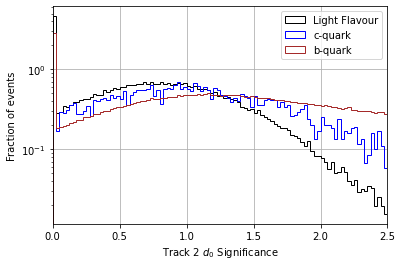

In [46]:
#3
n_bins = 100
plt.figure()
plt.grid()
_, _, _ = plt.hist(light_vec[:, 3], bins = n_bins, density = True, histtype = 'step', color = 'k', range = (0, 2.5), log = True, label = 'Light Flavour')
_, _, _ = plt.hist(charm_vec[:, 3], bins = n_bins, density = True, histtype = 'step', color = 'blue', range = (0, 2.5), log = True, label = 'c-quark')
_, _, _ = plt.hist(bottom_vec[:, 3], bins = n_bins, density = True, histtype = 'step', color = 'brown', range = (0, 2.5), log = True, label = 'b-quark')
plt.xlabel("Track 2 $d_0$ Significance")
plt.ylabel("Fraction of events")
plt.xlim(0, 2.5)
plt.legend()

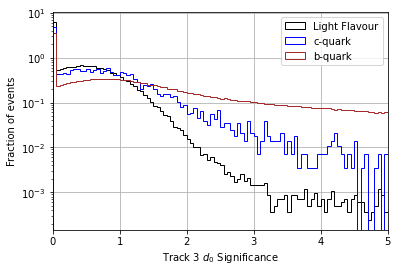

In [47]:
#4
n_bins = 100
plt.figure()
plt.grid()
_, _, _ = plt.hist(light_vec[:, 4], bins = n_bins, density = True, histtype = 'step', color = 'k', range = (0, 5), log = True, label = 'Light Flavour')
_, _, _ = plt.hist(charm_vec[:, 4], bins = n_bins, density = True, histtype = 'step', color = 'blue', range = (0, 5), log = True, label = 'c-quark')
_, _, _ = plt.hist(bottom_vec[:, 4], bins = n_bins, density = True, histtype = 'step', color = 'brown', range = (0, 5), log = True, label = 'b-quark')
plt.xlabel("Track 3 $d_0$ Significance")
plt.ylabel("Fraction of events")
plt.xlim(0, 5)
plt.legend()

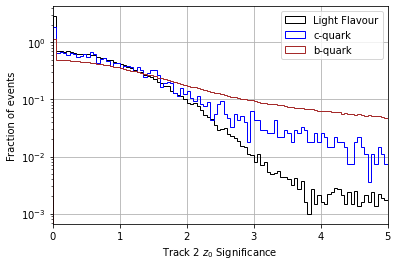

In [48]:
#5
n_bins = 100
plt.figure()
plt.grid()
_, _, _ = plt.hist(light_vec[:, 5], bins = n_bins, density = True, histtype = 'step', color = 'k', range = (0, 5), log = True, label = 'Light Flavour')
_, _, _ = plt.hist(charm_vec[:, 5], bins = n_bins, density = True, histtype = 'step', color = 'blue', range = (0, 5), log = True, label = 'c-quark')
_, _, _ = plt.hist(bottom_vec[:, 5], bins = n_bins, density = True, histtype = 'step', color = 'brown', range = (0, 5), log = True, label = 'b-quark')
plt.xlabel("Track 2 $z_0$ Significance")
plt.ylabel("Fraction of events")
plt.xlim(0, 5)
plt.legend()

In [ ]:
#6
n_bins = 100
plt.figure()
plt.grid()
_, _, _ = plt.hist(light_vec[:, 6], bins = n_bins, density = True, histtype = 'step', color = 'k', range = (0, 5), log = True, label = 'Light Flavour')
_, _, _ = plt.hist(charm_vec[:, 6], bins = n_bins, density = True, histtype = 'step', color = 'blue', range = (0, 5), log = True, label = 'c-quark')
_, _, _ = plt.hist(bottom_vec[:, 6], bins = n_bins, density = True, histtype = 'step', color = 'brown', range = (0, 5), log = True, label = 'b-quark')
plt.xlabel("Track 3 $z_0$ Significance")
plt.ylabel("Fraction of events")
plt.xlim(0, 5)
plt.legend()

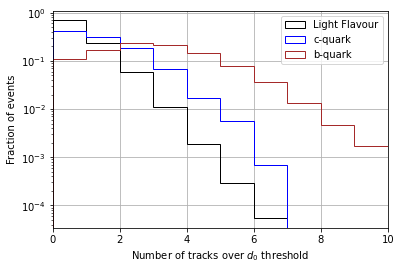

In [49]:
#7
n_bins = 10
plt.figure()
plt.grid()
_, _, _ = plt.hist(light_vec[:, 7], bins = n_bins, density = True, histtype = 'step', color = 'k', range = (0, 10), log = True, label = 'Light Flavour')
_, _, _ = plt.hist(charm_vec[:, 7], bins = n_bins, density = True, histtype = 'step', color = 'blue', range = (0, 10), log = True, label = 'c-quark')
_, _, _ = plt.hist(bottom_vec[:, 7], bins = n_bins, density = True, histtype = 'step', color = 'brown', range = (0, 10), log = True, label = 'b-quark')
plt.xlabel("Number of tracks over $d_0$ threshold")
plt.ylabel("Fraction of events")
plt.xlim(0, 10)
plt.legend()

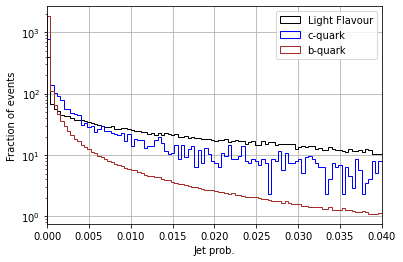

In [52]:
#8
n_bins = 100
plt.figure()
plt.grid()
_, _, _ = plt.hist(light_vec[:, 8], bins = n_bins, density = True, histtype = 'step', color = 'k', range = (0, 0.04), log = True, label = 'Light Flavour')
_, _, _ = plt.hist(charm_vec[:, 8], bins = n_bins, density = True, histtype = 'step', color = 'blue', range = (0, 0.04), log = True, label = 'c-quark')
_, _, _ = plt.hist(bottom_vec[:, 8], bins = n_bins, density = True, histtype = 'step', color = 'brown', range = (0, 0.04), log = True, label = 'b-quark')
plt.xlabel("Jet prob.")
plt.ylabel("Fraction of events")
plt.xlim(0, 0.04)
plt.legend()

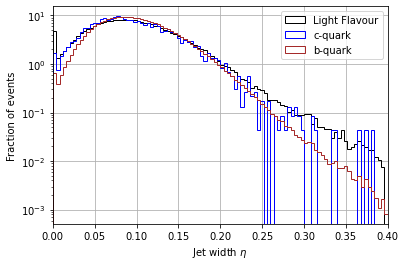

In [53]:
#9
n_bins = 100
plt.figure()
plt.grid()
_, _, _ = plt.hist(light_vec[:, 9], bins = n_bins, density = True, histtype = 'step', color = 'k', range = (0, 0.4), log = True, label = 'Light Flavour')
_, _, _ = plt.hist(charm_vec[:, 9], bins = n_bins, density = True, histtype = 'step', color = 'blue', range = (0, 0.4), log = True, label = 'c-quark')
_, _, _ = plt.hist(bottom_vec[:, 9], bins = n_bins, density = True, histtype = 'step', color = 'brown', range = (0, 0.4), log = True, label = 'b-quark')
plt.xlabel("Jet width $\eta$")
plt.ylabel("Fraction of events")
plt.xlim(0, 0.4)
plt.legend()

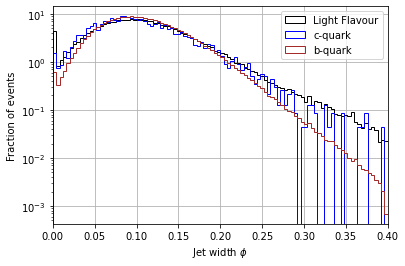

In [54]:
#10
n_bins = 100
plt.figure()
plt.grid()
_, _, _ = plt.hist(light_vec[:, 10], bins = n_bins, density = True, histtype = 'step', color = 'k', range = (0, 0.4), log = True, label = 'Light Flavour')
_, _, _ = plt.hist(charm_vec[:, 10], bins = n_bins, density = True, histtype = 'step', color = 'blue', range = (0, 0.4), log = True, label = 'c-quark')
_, _, _ = plt.hist(bottom_vec[:, 10], bins = n_bins, density = True, histtype = 'step', color = 'brown', range = (0, 0.4), log = True, label = 'b-quark')
plt.xlabel("Jet width $\phi$")
plt.ylabel("Fraction of events")
plt.xlim(0, 0.4)
plt.legend()

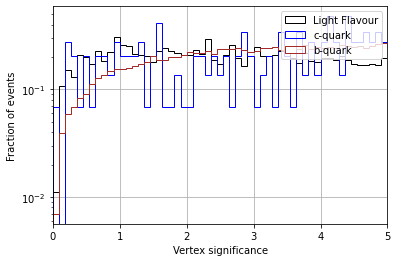

In [55]:
#11
n_bins = 55
plt.figure()
plt.grid()
_, _, _ = plt.hist(light_vec[:, 11], bins = n_bins, density = True, histtype = 'step', color = 'k', range = (0, 5), log = True, label = 'Light Flavour')
_, _, _ = plt.hist(charm_vec[:, 11], bins = n_bins, density = True, histtype = 'step', color = 'blue', range = (0, 5), log = True, label = 'c-quark')
_, _, _ = plt.hist(bottom_vec[:, 11], bins = n_bins, density = True, histtype = 'step', color = 'brown', range = (0, 5), log = True, label = 'b-quark')
plt.xlabel("Vertex significance")
plt.ylabel("Fraction of events")
plt.xlim(0, 5)
plt.legend()

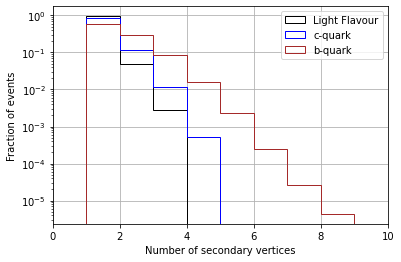

In [56]:
#12
n_bins = 10
plt.figure()
plt.grid()
_, _, _ = plt.hist(light_vec[:, 12], bins = n_bins, density = True, histtype = 'step', color = 'k', range = (0, 10), log = True, label = 'Light Flavour')
_, _, _ = plt.hist(charm_vec[:, 12], bins = n_bins, density = True, histtype = 'step', color = 'blue', range = (0, 10), log = True, label = 'c-quark')
_, _, _ = plt.hist(bottom_vec[:, 12], bins = n_bins, density = True, histtype = 'step', color = 'brown', range = (0, 10), log = True, label = 'b-quark')
plt.xlabel("Number of secondary vertices")
plt.ylabel("Fraction of events")
plt.xlim(0, 10)
plt.legend()

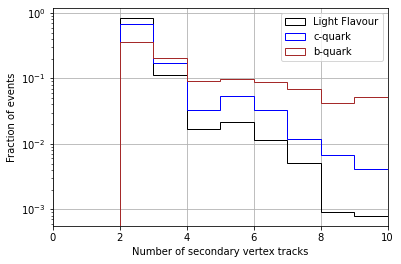

In [57]:
#13
n_bins = 10
plt.figure()
plt.grid()
_, _, _ = plt.hist(light_vec[:, 13], bins = n_bins, density = True, histtype = 'step', color = 'k', range = (0, 10), log = True, label = 'Light Flavour')
_, _, _ = plt.hist(charm_vec[:, 13], bins = n_bins, density = True, histtype = 'step', color = 'blue', range = (0, 10), log = True, label = 'c-quark')
_, _, _ = plt.hist(bottom_vec[:, 13], bins = n_bins, density = True, histtype = 'step', color = 'brown', range = (0, 10), log = True, label = 'b-quark')
plt.xlabel("Number of secondary vertex tracks")
plt.ylabel("Fraction of events")
plt.xlim(0, 10)
plt.legend()

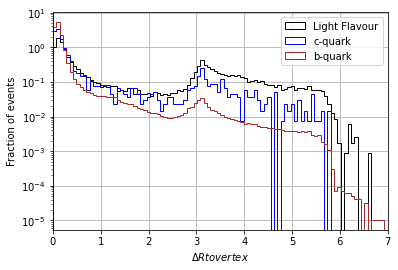

In [59]:
#14
n_bins = 100
plt.figure()
plt.grid()
_, _, _ = plt.hist(light_vec[:, 14], bins = n_bins, density = True, histtype = 'step', color = 'k', range = (0, 7), log = True, label = 'Light Flavour')
_, _, _ = plt.hist(charm_vec[:, 14], bins = n_bins, density = True, histtype = 'step', color = 'blue', range = (0, 7), log = True, label = 'c-quark')
_, _, _ = plt.hist(bottom_vec[:, 14], bins = n_bins, density = True, histtype = 'step', color = 'brown', range = (0, 7), log = True, label = 'b-quark')
plt.xlabel("$\Delta R to vertex$")
plt.ylabel("Fraction of events")
plt.xlim(0, 7)
plt.legend()

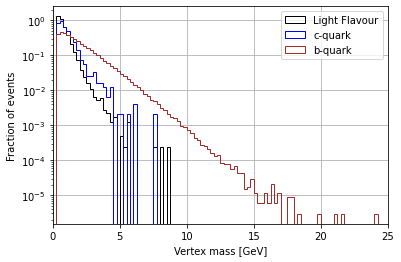

In [60]:
#15
n_bins = 100
plt.figure()
plt.grid()
_, _, _ = plt.hist(light_vec[:, 15], bins = n_bins, density = True, histtype = 'step', color = 'k', range = (0, 25), log = True, label = 'Light Flavour')
_, _, _ = plt.hist(charm_vec[:, 15], bins = n_bins, density = True, histtype = 'step', color = 'blue', range = (0, 25), log = True, label = 'c-quark')
_, _, _ = plt.hist(bottom_vec[:, 15], bins = n_bins, density = True, histtype = 'step', color = 'brown', range = (0, 25), log = True, label = 'b-quark')
plt.xlabel("Vertex mass [GeV]")
plt.ylabel("Fraction of events")
plt.xlim(0, 25)
plt.legend()

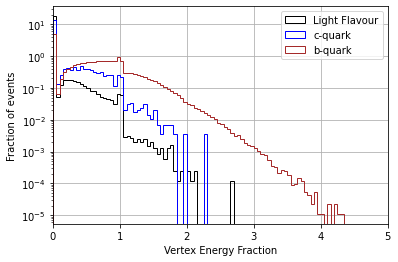

In [63]:
#16
n_bins = 100
plt.figure()
plt.grid()
_, _, _ = plt.hist(light_vec[:, 16], bins = n_bins, density = True, histtype = 'step', color = 'k', range = (0, 5), log = True, label = 'Light Flavour')
_, _, _ = plt.hist(charm_vec[:, 16], bins = n_bins, density = True, histtype = 'step', color = 'blue', range = (0, 5), log = True, label = 'c-quark')
_, _, _ = plt.hist(bottom_vec[:, 16], bins = n_bins, density = True, histtype = 'step', color = 'brown', range = (0, 5), log = True, label = 'b-quark')
plt.xlabel("Vertex Energy Fraction")
plt.ylabel("Fraction of events")
plt.xlim(0, 5)
plt.legend()

## Figura con istogrammi insieme

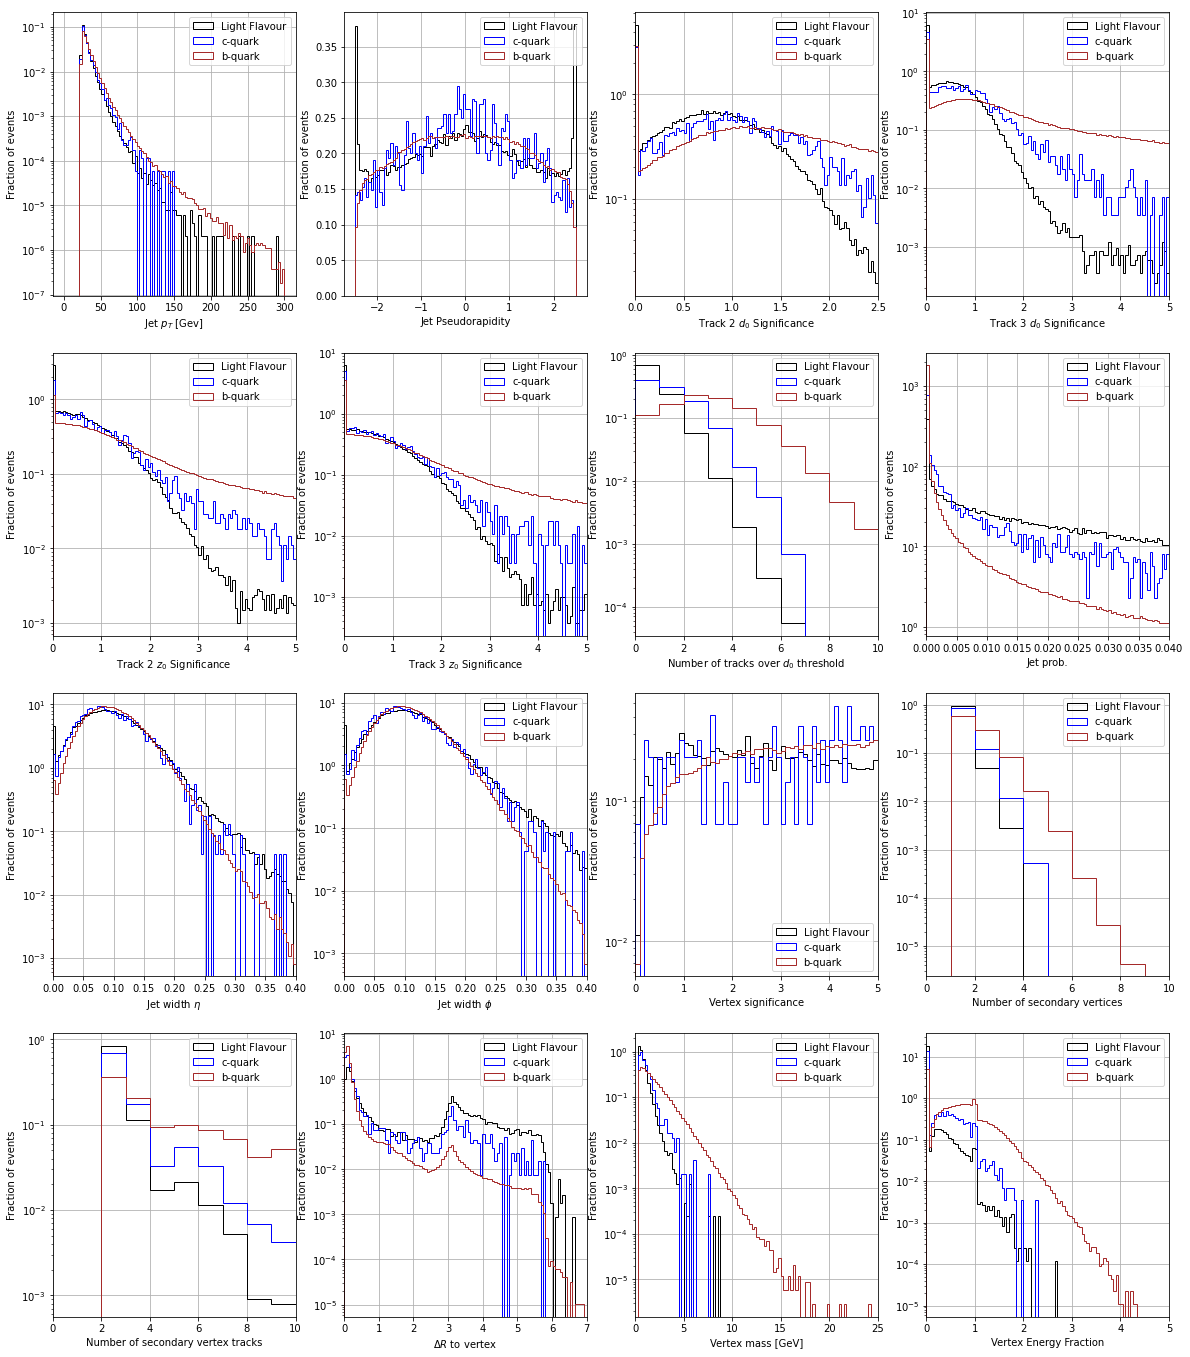

In [75]:
plt.figure(figsize = (20, 24))

#Istogramma 1
plt.subplot(4, 4, 1)
n_bins = 100
_, _, _ = plt.hist(light_vec[:, 0], bins = n_bins, density = True, histtype = 'step', color = 'k', range = (0, 300), log = True, label = 'Light Flavour')
_, _, _ = plt.hist(charm_vec[:, 0], bins = n_bins, density = True, histtype = 'step', color = 'blue', range = (0, 300), log = True, label = 'c-quark')
_, _, _ = plt.hist(bottom_vec[:, 0], bins = n_bins, density = True, histtype = 'step', color = 'brown', range = (0, 300), log = True, label = 'b-quark')
plt.xlabel("Jet $p_T$ [Gev]")
plt.ylabel("Fraction of events")
plt.grid()
plt.legend()
#plt.show()

#Istogramma 2
plt.subplot(4, 4, 2)
n_bins = 100
plt.grid()
_, _, _ = plt.hist(light_vec[:, 1], bins = n_bins, density = True, histtype = 'step', color = 'k', label = 'Light Flavour')
_, _, _ = plt.hist(charm_vec[:, 1], bins = n_bins, density = True, histtype = 'step', color = 'blue', label = 'c-quark')
_, _, _ = plt.hist(bottom_vec[:, 1], bins = n_bins, density = True, histtype = 'step', color = 'brown', label = 'b-quark')
plt.xlabel("Jet Pseudorapidity")
plt.ylabel("Fraction of events")
plt.legend()
#plt.show()

#Istogramma 3
plt.subplot(4, 4, 3)
n_bins = 100
plt.grid()
_, _, _ = plt.hist(light_vec[:, 3], bins = n_bins, density = True, histtype = 'step', color = 'k', range = (0, 2.5), log = True, label = 'Light Flavour')
_, _, _ = plt.hist(charm_vec[:, 3], bins = n_bins, density = True, histtype = 'step', color = 'blue', range = (0, 2.5), log = True, label = 'c-quark')
_, _, _ = plt.hist(bottom_vec[:, 3], bins = n_bins, density = True, histtype = 'step', color = 'brown', range = (0, 2.5), log = True, label = 'b-quark')
plt.xlabel("Track 2 $d_0$ Significance")
plt.ylabel("Fraction of events")
plt.xlim(0, 2.5)
plt.legend()
#plt.show()

#Istogramma 4
plt.subplot(4, 4, 4)
n_bins = 100
plt.grid()
_, _, _ = plt.hist(light_vec[:, 4], bins = n_bins, density = True, histtype = 'step', color = 'k', range = (0, 5), log = True, label = 'Light Flavour')
_, _, _ = plt.hist(charm_vec[:, 4], bins = n_bins, density = True, histtype = 'step', color = 'blue', range = (0, 5), log = True, label = 'c-quark')
_, _, _ = plt.hist(bottom_vec[:, 4], bins = n_bins, density = True, histtype = 'step', color = 'brown', range = (0, 5), log = True, label = 'b-quark')
plt.xlabel("Track 3 $d_0$ Significance")
plt.ylabel("Fraction of events")
plt.xlim(0, 5)
plt.legend()
#plt.show()

#Istogramma 5
plt.subplot(4, 4, 5)
n_bins = 100
plt.grid()
_, _, _ = plt.hist(light_vec[:, 5], bins = n_bins, density = True, histtype = 'step', color = 'k', range = (0, 5), log = True, label = 'Light Flavour')
_, _, _ = plt.hist(charm_vec[:, 5], bins = n_bins, density = True, histtype = 'step', color = 'blue', range = (0, 5), log = True, label = 'c-quark')
_, _, _ = plt.hist(bottom_vec[:, 5], bins = n_bins, density = True, histtype = 'step', color = 'brown', range = (0, 5), log = True, label = 'b-quark')
plt.xlabel("Track 2 $z_0$ Significance")
plt.ylabel("Fraction of events")
plt.xlim(0, 5)
plt.legend()
#plt.show()

#Istogramma 6
plt.subplot(4, 4, 6)
n_bins = 100
plt.grid()
_, _, _ = plt.hist(light_vec[:, 6], bins = n_bins, density = True, histtype = 'step', color = 'k', range = (0, 5), log = True, label = 'Light Flavour')
_, _, _ = plt.hist(charm_vec[:, 6], bins = n_bins, density = True, histtype = 'step', color = 'blue', range = (0, 5), log = True, label = 'c-quark')
_, _, _ = plt.hist(bottom_vec[:, 6], bins = n_bins, density = True, histtype = 'step', color = 'brown', range = (0, 5), log = True, label = 'b-quark')
plt.xlabel("Track 3 $z_0$ Significance")
plt.ylabel("Fraction of events")
plt.xlim(0, 5)
plt.legend()
#plt.show()

#Istogramma 7
plt.subplot(4, 4, 7)
n_bins = 10
plt.grid()
_, _, _ = plt.hist(light_vec[:, 7], bins = n_bins, density = True, histtype = 'step', color = 'k', range = (0, 10), log = True, label = 'Light Flavour')
_, _, _ = plt.hist(charm_vec[:, 7], bins = n_bins, density = True, histtype = 'step', color = 'blue', range = (0, 10), log = True, label = 'c-quark')
_, _, _ = plt.hist(bottom_vec[:, 7], bins = n_bins, density = True, histtype = 'step', color = 'brown', range = (0, 10), log = True, label = 'b-quark')
plt.xlabel("Number of tracks over $d_0$ threshold")
plt.ylabel("Fraction of events")
plt.xlim(0, 10)
plt.legend()
#plt.show()

#Istogramma 8
plt.subplot(4, 4, 8)
n_bins = 100
plt.grid()
_, _, _ = plt.hist(light_vec[:, 8], bins = n_bins, density = True, histtype = 'step', color = 'k', range = (0, 0.04), log = True, label = 'Light Flavour')
_, _, _ = plt.hist(charm_vec[:, 8], bins = n_bins, density = True, histtype = 'step', color = 'blue', range = (0, 0.04), log = True, label = 'c-quark')
_, _, _ = plt.hist(bottom_vec[:, 8], bins = n_bins, density = True, histtype = 'step', color = 'brown', range = (0, 0.04), log = True, label = 'b-quark')
plt.xlabel("Jet prob.")
plt.ylabel("Fraction of events")
plt.xlim(0, 0.04)
plt.legend()
#plt.show()

#Istogramma 9
plt.subplot(4, 4, 9)
n_bins = 100
plt.grid()
_, _, _ = plt.hist(light_vec[:, 9], bins = n_bins, density = True, histtype = 'step', color = 'k', range = (0, 0.4), log = True, label = 'Light Flavour')
_, _, _ = plt.hist(charm_vec[:, 9], bins = n_bins, density = True, histtype = 'step', color = 'blue', range = (0, 0.4), log = True, label = 'c-quark')
_, _, _ = plt.hist(bottom_vec[:, 9], bins = n_bins, density = True, histtype = 'step', color = 'brown', range = (0, 0.4), log = True, label = 'b-quark')
plt.xlabel("Jet width $\eta$")
plt.ylabel("Fraction of events")
plt.xlim(0, 0.4)
#plt.legend()
#plt.show()

#Istogramma 10
plt.subplot(4, 4, 10)
n_bins = 100
plt.grid()
_, _, _ = plt.hist(light_vec[:, 10], bins = n_bins, density = True, histtype = 'step', color = 'k', range = (0, 0.4), log = True, label = 'Light Flavour')
_, _, _ = plt.hist(charm_vec[:, 10], bins = n_bins, density = True, histtype = 'step', color = 'blue', range = (0, 0.4), log = True, label = 'c-quark')
_, _, _ = plt.hist(bottom_vec[:, 10], bins = n_bins, density = True, histtype = 'step', color = 'brown', range = (0, 0.4), log = True, label = 'b-quark')
plt.xlabel("Jet width $\phi$")
plt.ylabel("Fraction of events")
plt.xlim(0, 0.4)
plt.legend()
#plt.show()

#Istogramma 11
plt.subplot(4, 4, 11)
n_bins = 55
plt.grid()
_, _, _ = plt.hist(light_vec[:, 11], bins = n_bins, density = True, histtype = 'step', color = 'k', range = (0, 5), log = True, label = 'Light Flavour')
_, _, _ = plt.hist(charm_vec[:, 11], bins = n_bins, density = True, histtype = 'step', color = 'blue', range = (0, 5), log = True, label = 'c-quark')
_, _, _ = plt.hist(bottom_vec[:, 11], bins = n_bins, density = True, histtype = 'step', color = 'brown', range = (0, 5), log = True, label = 'b-quark')
plt.xlabel("Vertex significance")
plt.ylabel("Fraction of events")
plt.xlim(0, 5)
plt.legend(loc = 'lower right')
#plt.show()

#Istogramma 12
plt.subplot(4, 4, 12)
n_bins = 10
plt.grid()
_, _, _ = plt.hist(light_vec[:, 12], bins = n_bins, density = True, histtype = 'step', color = 'k', range = (0, 10), log = True, label = 'Light Flavour')
_, _, _ = plt.hist(charm_vec[:, 12], bins = n_bins, density = True, histtype = 'step', color = 'blue', range = (0, 10), log = True, label = 'c-quark')
_, _, _ = plt.hist(bottom_vec[:, 12], bins = n_bins, density = True, histtype = 'step', color = 'brown', range = (0, 10), log = True, label = 'b-quark')
plt.xlabel("Number of secondary vertices")
plt.ylabel("Fraction of events")
plt.xlim(0, 10)
plt.legend()
#plt.show()

#Istogramma 13
plt.subplot(4, 4, 13)
n_bins = 10
plt.grid()
_, _, _ = plt.hist(light_vec[:, 13], bins = n_bins, density = True, histtype = 'step', color = 'k', range = (0, 10), log = True, label = 'Light Flavour')
_, _, _ = plt.hist(charm_vec[:, 13], bins = n_bins, density = True, histtype = 'step', color = 'blue', range = (0, 10), log = True, label = 'c-quark')
_, _, _ = plt.hist(bottom_vec[:, 13], bins = n_bins, density = True, histtype = 'step', color = 'brown', range = (0, 10), log = True, label = 'b-quark')
plt.xlabel("Number of secondary vertex tracks")
plt.ylabel("Fraction of events")
plt.xlim(0, 10)
plt.legend()
#plt.show()

#Istogramma 14
plt.subplot(4, 4, 14)
n_bins = 100
plt.grid()
_, _, _ = plt.hist(light_vec[:, 14], bins = n_bins, density = True, histtype = 'step', color = 'k', range = (0, 7), log = True, label = 'Light Flavour')
_, _, _ = plt.hist(charm_vec[:, 14], bins = n_bins, density = True, histtype = 'step', color = 'blue', range = (0, 7), log = True, label = 'c-quark')
_, _, _ = plt.hist(bottom_vec[:, 14], bins = n_bins, density = True, histtype = 'step', color = 'brown', range = (0, 7), log = True, label = 'b-quark')
plt.xlabel("$\Delta R$ to vertex")
plt.ylabel("Fraction of events")
plt.xlim(0, 7)
plt.legend()
#plt.show()

#Istogramma 15
plt.subplot(4, 4, 15)
n_bins = 100
plt.grid()
_, _, _ = plt.hist(light_vec[:, 15], bins = n_bins, density = True, histtype = 'step', color = 'k', range = (0, 25), log = True, label = 'Light Flavour')
_, _, _ = plt.hist(charm_vec[:, 15], bins = n_bins, density = True, histtype = 'step', color = 'blue', range = (0, 25), log = True, label = 'c-quark')
_, _, _ = plt.hist(bottom_vec[:, 15], bins = n_bins, density = True, histtype = 'step', color = 'brown', range = (0, 25), log = True, label = 'b-quark')
plt.xlabel("Vertex mass [GeV]")
plt.ylabel("Fraction of events")
plt.xlim(0, 25)
plt.legend()
#plt.show()

#Istogramma 16
plt.subplot(4, 4, 16)
n_bins = 100
plt.grid()
_, _, _ = plt.hist(light_vec[:, 16], bins = n_bins, density = True, histtype = 'step', color = 'k', range = (0, 5), log = True, label = 'Light Flavour')
_, _, _ = plt.hist(charm_vec[:, 16], bins = n_bins, density = True, histtype = 'step', color = 'blue', range = (0, 5), log = True, label = 'c-quark')
_, _, _ = plt.hist(bottom_vec[:, 16], bins = n_bins, density = True, histtype = 'step', color = 'brown', range = (0, 5), log = True, label = 'b-quark')
plt.xlabel("Vertex Energy Fraction")
plt.ylabel("Fraction of events")
plt.xlim(0, 5)
plt.legend()
#plt.show()

plt.savefig("dataset.pdf")